# Neural network classification with pytorch

In [26]:
import torch
from torch import nn
import torchvision

import sklearn
from sklearn.datasets import make_circles

import matplotlib.pyplot as plt
import pandas as pd

In [27]:
# Make classification data and get it ready

# make 1000 samples
n_samples = 1000

# create circles
X,y = make_circles(n_samples, noise=0.03, random_state=57)

In [28]:
len(X), len(y)
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")
# 2 feature of X relate to 1 label of y


First 5 X features:
[[-0.79885014 -0.21122146]
 [-0.40416824 -0.93006724]
 [ 0.35952679  0.92226024]
 [ 0.81032948  0.16657051]
 [-0.65233723 -0.77880979]]

First 5 y labels:
[1 0 0 1 0]


In [29]:
circles = pd.DataFrame({"X1": X[:, 0],
                         "X2": X[:,1],
                         "label" : y})

circles.head(10)

,X1,X2,label
0,-0.798850,-0.211221,1
1,-0.404168,-0.930067,0
2,0.359527,0.922260,0
3,0.810329,0.166571,1
4,-0.652337,-0.778810,0
5,-0.732504,-0.388679,1
6,0.884260,-0.508534,0
7,0.550650,0.843505,0
8,0.636806,0.733344,0
9,0.041497,-0.975589,0


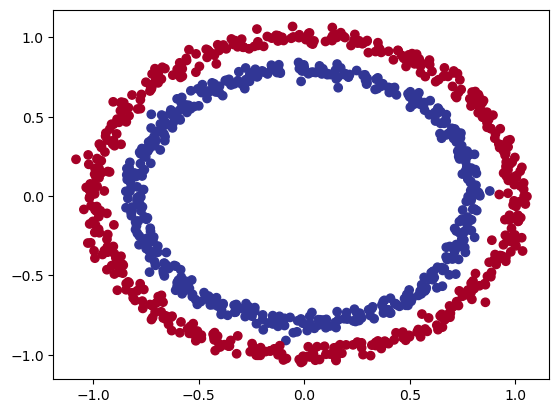

In [30]:
# Visualize
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [31]:
# Check ip and op shapes
X.shape, y.shape

((1000, 2), (1000,))

In [32]:
# Turn data to tensor and split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [33]:
# split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=17)

In [34]:
# Building a model

class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        # 2 nn.linear layer

        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x -> layer1 -> layer2
    

# init a instance
model_0 = CircleModelV1()
model_0


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [35]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)


model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5468, -0.6740],
                      [-0.3425,  0.2143],
                      [-0.1725, -0.6569],
                      [-0.2584,  0.4572],
                      [-0.3356,  0.0797]])),
             ('0.bias', tensor([ 0.3861,  0.3863,  0.0525,  0.3721, -0.0651])),
             ('1.weight',
              tensor([[-0.1022, -0.2528, -0.2570, -0.1795,  0.3543]])),
             ('1.bias', tensor([-0.0550]))])

In [36]:
# Make Predcitions
with torch.inference_mode():
    untrained_preds = model_0(X_test)
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.1971],
        [-0.1364],
        [-0.1591],
        [-0.3350],
        [-0.3705],
        [-0.1321],
        [-0.3741],
        [-0.2185],
        [-0.4598],
        [-0.1621]])

First 10 test labels:
tensor([0., 0., 1., 1., 1., 0., 1., 0., 0., 1.])


In [37]:
# Loss func and optimizerr

# for regression, MAE or MSE
# for classisication binary cross entropy or categorical cross entropy

# loss_fn = nn.BCELoss() requires to have go through sigmoid prior inpiut 

loss_fn = nn.BCEWithLogitsLoss() # sigmoid activatoin function builtin


optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


In [38]:
# Accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [39]:
# Train

#Forward pass - The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).\

#Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).

#Zero gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).

#Perform backpropagation on the loss - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (loss.backward()).

#Step the optimizer (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).


In [40]:
# GOing from raw logits -> prediction probabilities -> prediction lables
# Model output are going to be raw logits
# Convert logits into prediction probabilities by passing them by some activation function

# COnvert prediction probabilities to prediction lables by either rounging them or argmax()

In [41]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test)[:5]
y_logits

tensor([[-0.1971],
        [-0.1364],
        [-0.1591],
        [-0.3350],
        [-0.3705]])

In [42]:
# USe sigmoid on our logits to turn into prediction probs
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4509],
        [0.4659],
        [0.4603],
        [0.4170],
        [0.4084]])



For our prediction probability values, we need to perform a range-style rounding on them:

* y_pred_probs >= 0.5, `y=1` (class 1)
* y_pred_probs < 0.5, `y=0` (class 0)



In [43]:
# FInd the predicted labels

y_preds = torch.round(y_pred_probs)

# In FUll ( logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test)[:5]))

# CHeck for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

In [44]:
# training loop
torch.manual_seed(57)

epoch = 1000

for epoch in range(epoch):

    model_0.eval()

    # Forward Pass\
    y_logits =   model_0(X_train).squeeze()  
    y_pred = torch.round(torch.sigmoid(y_logits))  

    # Loss and accuracy

    # IF nn.BCELoss
    #loss = loss_fn(torch.sigmoid(y_logits)), y_train
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # OPtimizer zero grad
    optimizer.zero_grad()

    # Loss BAckward (back propogation)
    loss.backward()

    #optimizer step (gradient descent)
    optimizer.step()

    # Testing
    model_0.eval()
    with torch.inference_mode():
        # fwd pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # TEst Loss
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
    
     # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
                            

 

Epoch: 0 | Loss: 0.70448, Accuracy: 50.38% | Test loss: 0.70848, Test acc: 48.50%
Epoch: 10 | Loss: 0.69788, Accuracy: 50.38% | Test loss: 0.70116, Test acc: 48.50%
Epoch: 20 | Loss: 0.69516, Accuracy: 50.38% | Test loss: 0.69786, Test acc: 48.50%
Epoch: 30 | Loss: 0.69400, Accuracy: 44.88% | Test loss: 0.69629, Test acc: 41.00%
Epoch: 40 | Loss: 0.69348, Accuracy: 45.00% | Test loss: 0.69550, Test acc: 39.00%
Epoch: 50 | Loss: 0.69325, Accuracy: 48.00% | Test loss: 0.69509, Test acc: 44.00%
Epoch: 60 | Loss: 0.69313, Accuracy: 49.00% | Test loss: 0.69486, Test acc: 43.00%
Epoch: 70 | Loss: 0.69307, Accuracy: 49.25% | Test loss: 0.69473, Test acc: 43.50%
Epoch: 80 | Loss: 0.69303, Accuracy: 49.88% | Test loss: 0.69466, Test acc: 44.50%
Epoch: 90 | Loss: 0.69301, Accuracy: 49.12% | Test loss: 0.69462, Test acc: 46.50%
Epoch: 100 | Loss: 0.69299, Accuracy: 49.25% | Test loss: 0.69461, Test acc: 46.50%
Epoch: 110 | Loss: 0.69298, Accuracy: 50.00% | Test loss: 0.69460, Test acc: 46.00%
Epo

Epoch: 480 | Loss: 0.69294, Accuracy: 49.50% | Test loss: 0.69501, Test acc: 46.00%
Epoch: 490 | Loss: 0.69294, Accuracy: 49.50% | Test loss: 0.69502, Test acc: 46.00%
Epoch: 500 | Loss: 0.69294, Accuracy: 49.50% | Test loss: 0.69502, Test acc: 46.00%
Epoch: 510 | Loss: 0.69294, Accuracy: 49.50% | Test loss: 0.69502, Test acc: 46.00%
Epoch: 520 | Loss: 0.69294, Accuracy: 49.50% | Test loss: 0.69502, Test acc: 46.00%
Epoch: 530 | Loss: 0.69294, Accuracy: 49.50% | Test loss: 0.69503, Test acc: 46.00%
Epoch: 540 | Loss: 0.69294, Accuracy: 49.50% | Test loss: 0.69503, Test acc: 46.00%
Epoch: 550 | Loss: 0.69294, Accuracy: 49.50% | Test loss: 0.69503, Test acc: 46.50%
Epoch: 560 | Loss: 0.69294, Accuracy: 49.62% | Test loss: 0.69503, Test acc: 46.50%
Epoch: 570 | Loss: 0.69294, Accuracy: 49.75% | Test loss: 0.69504, Test acc: 46.50%
Epoch: 580 | Loss: 0.69294, Accuracy: 49.75% | Test loss: 0.69504, Test acc: 46.50%
Epoch: 590 | Loss: 0.69294, Accuracy: 49.75% | Test loss: 0.69504, Test acc:

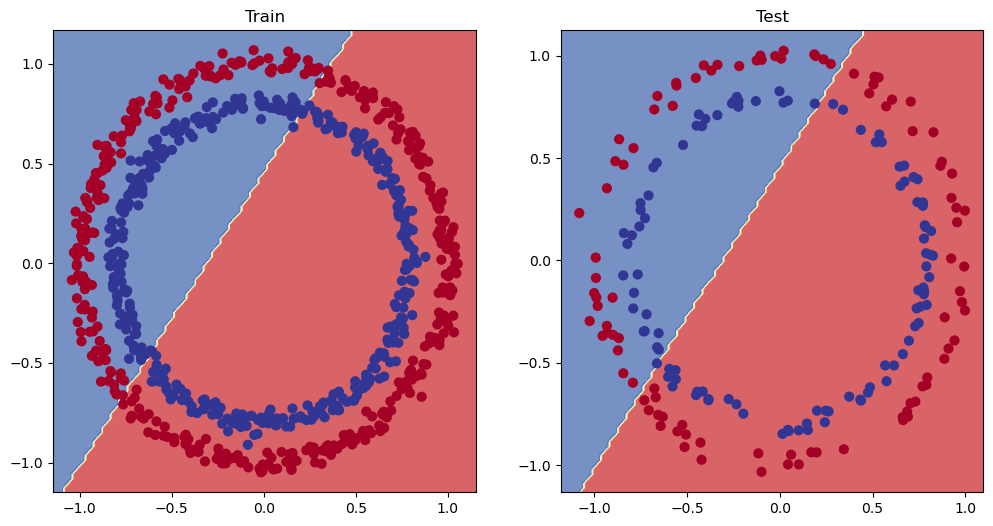

In [45]:


from helper_functions import plot_predictions, plot_decision_boundary
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

#### improve the model

* Addd more layers
* Add more hidden units
* Fit for longer
* Changing the activation function
* Change Learning rate
* Change loss function
 


In [46]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [49]:
class CircleModelV2(nn.Module):
    def __init__(self) :
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV2().to(device)
model_1

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [50]:

# Losss func

# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input


# optimizer
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)


In [52]:
torch.cuda.manual_seed(57)
torch.manual_seed(57)

epochs = 1000



torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):
    model_1.train()

    # fwd pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # optimizer zero gradf
    optimizer.zero_grad()

    # loss back
    loss.backward()

    # optimizer step
    optimizer.step()

    # Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}")